<a href="https://colab.research.google.com/github/ZhizhchenkoA/Mechanic_Project/blob/main/Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
mu = 0.1
def f(x, y):
  r1 = ((x + mu) ** 2 + y ** 2) ** 0.5
  r2 = ((x - 1 + mu) ** 2 + y ** 2) ** 0.5
  return x ** 2 + y ** 2 + (1 - mu) / r1 + mu / r2 + ((1 - mu) * mu) / 2

100%|██████████| 300/300 [00:01<00:00, 169.08it/s]


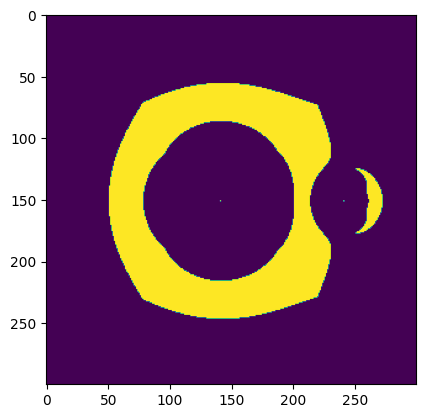

In [ ]:
lim_x_min, lim_x_max = -1.5, 1.5
step_x = 0.01
lim_y_min, lim_y_max = -1.5, 1.5
step_y = 0.01
mx = np.arange(lim_x_min, lim_x_max, step_x)
my = np.arange(lim_y_min, lim_y_max, step_y)
ans_x, ans_y = np.array([]), np.array([])
xg, yg = [], []
epsilon = 8e-5
for x in tqdm(mx):
  for y in my:
    if (f(x, y) - f(x - step_x, y)) * (f(x + step_x, y) - f(x, y)) < epsilon and \
     (f(x, y) - f(x, y - step_y)) * (f(x, y + step_y) - f(x, y)) < epsilon:
        ans_x = np.append(ans_x, x)
        ans_y = np.append(ans_y, y)
        xg.append(int((lim_x_min + x) * (1 / step_x)))
        yg.append(int((lim_y_min + y) * (1 / step_y)))
k = int((lim_x_max - lim_x_min) / step_x)
arr = np.zeros((k, k))
arr[yg, xg] = 1
plt.imshow(arr)
plt.show()

In [3]:
def x_dot(x, y, px, py):
  ...

def y_dot(x, y, px, py):
  ...

def px_dot(x, y, px, py):
  ...

def py_dot(x, y, px, py):
  ...

In [5]:
x = 0
y = 0
px = 0
py = 0
delta_t = 0.1
t_summ = 10
X, Y, PX, PY = [x], [y], [px], [py]
for i in range(1, t_summ + 1):
  X.append[X[-1] + x_dot(x, y, px, py) * delta_t]
  Y.append[Y[-1] + y_dot(x, y, px, py) * delta_t]
  PX.append[PX[-1] + px_dot(x, y, px, py) * delta_t]
  PY.append[PY[-1] + py_dot(x, y, px, py) * delta_t]
  x = X[-1]
  y = Y[-1]
  px = PX[-1]
  py = PY[-1]


